IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

In [2]:
df = pd.read_csv("IRIS.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
df.shape  # number of rows and cloumns

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
Species = df['species'].value_counts().reset_index()
Species

,index,species
0,setosa,50
1,versicolor,50
2,virginica,50


In [8]:
df['species'],categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


VISUALIZATION

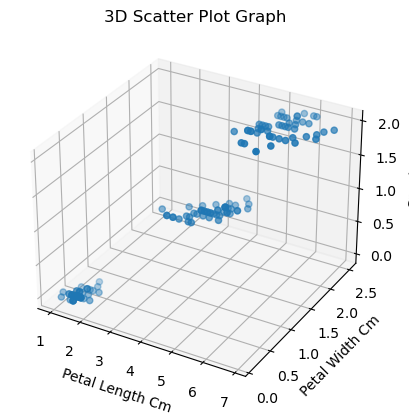

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.petal_length, df.petal_width, df.species)
ax.set_xlabel('Petal Length Cm')
ax.set_ylabel('Petal Width Cm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Graph')
plt.show()

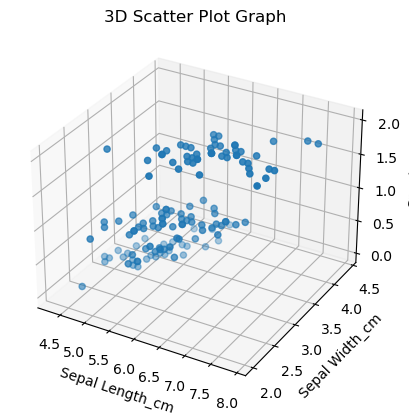

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.sepal_length, df.sepal_width, df.species)
ax.set_xlabel('Sepal Length_cm')
ax.set_ylabel('Sepal Width_cm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Graph')
plt.show()

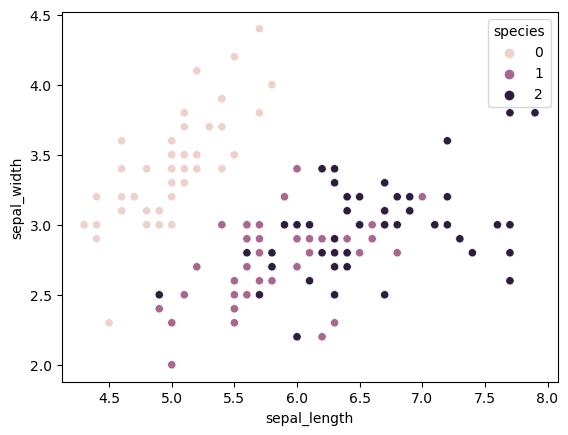

In [11]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species") # 0 for setosa , 1 for versicolor , 2 for virginica
plt.show()

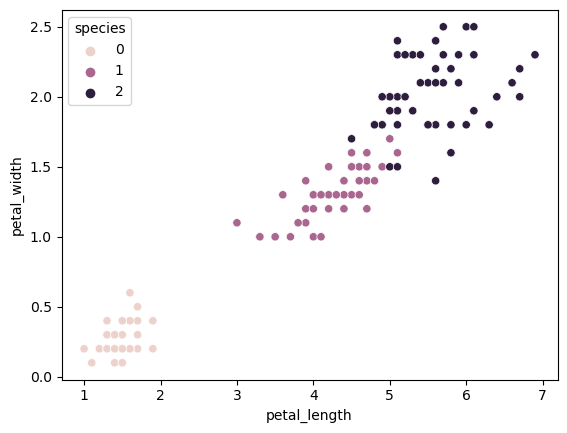

In [12]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species") # 0 for setosa , 1 for versicolor , 2 for virginica
plt.show()

APPLYING ELBOW TECHNIQUE

In [13]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [14]:
sse

[550.6434666666668,
 86.40394533571005,
 31.387758974358974,
 19.499400899685114,
 13.933308757908756,
 11.085755522773372,
 9.337790756302523,
 7.631802244955955,
 6.663104739704739]

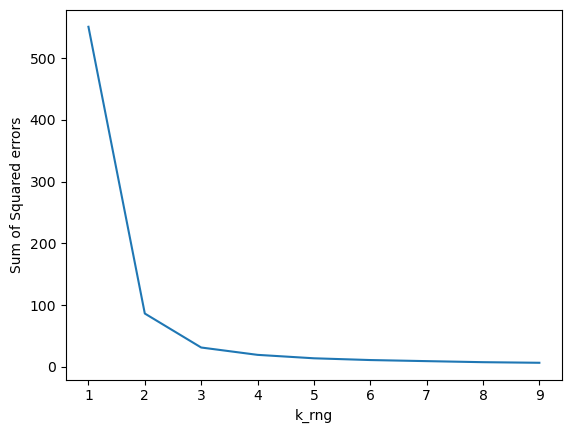

In [15]:
plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng, sse)

APPLYING KMEANS ALGORITHM

In [16]:
km = KMeans(n_clusters=3,random_state=0,)
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
df['cluster'] = y_predicted
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


ACCURACY MEASURE

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

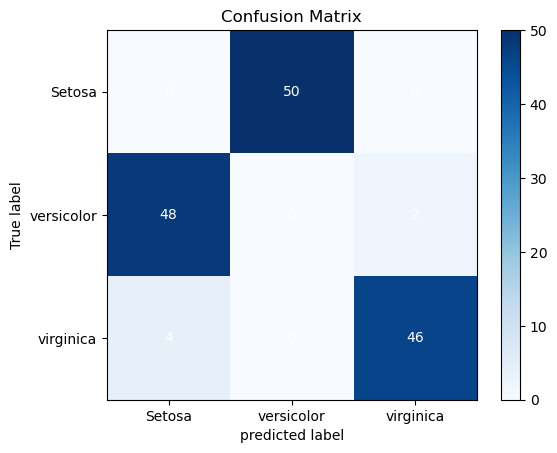

In [19]:
# plot confusion matrix
true_labels = df.species
predicted_labels = df.cluster
cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor' , 'virginica' ]

plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()